In [1]:
using Plots
using MLDatasets
using LinearAlgebra
using ProgressMeter

include("Neural_Network.jl")

Test_2Layer (generic function with 1 method)

In [2]:
function one_hot_encode(labels, num_classes)
    one_hot = zeros(Float64, num_classes, length(labels))
    for (i, label) in enumerate(labels)
        one_hot[ label + 1, i] = 1.0
    end
    return one_hot
end

one_hot_encode (generic function with 1 method)

In [ ]:
train_x, train_y = MNIST(split=:train)[:]
test_x, test_y = MNIST(split=:test)[:]

train_x = Float64.( train_x .> 0) 
test_x = Float64.( test_x .> 0) 

npixels = size( train_x )[1]
ndata_train = size( train_x )[3]
ndata_test = size( test_x )[3]
num_classes = 10

train_x = reshape(train_x, npixels*npixels, :) 
train_y = one_hot_encode(train_y, num_classes)

test_x = reshape(test_x, npixels*npixels, :)
test_y = one_hot_encode(test_y, num_classes)

training_data = [ (train_x[:,q] , train_y[:,q] ) for q in 1:ndata_train ];
test_data = [ (test_x[:,q] , test_y[:,q]) for q in 1:ndata_test ];

# Input Parameters
Sizes = [[npixels*npixels, q, j, num_classes, k] for q in [20,40] for j in [20,40] for k in [10]]
λ = range( 10e-4,10e-2 , 100)

0.001:0.001:0.1

In [ ]:
NNs = [ NeuralNetwork( q , j ) for q in Sizes , j in λ ]

4×100 Matrix{NeuralNetwork}:
 NeuralNetwork([784, 20, 20, 10], [0.403852 1.36409 … 1.04466 -0.952573; 0.936987 2.48232 … 1.13762 -0.518421; … ; 0.181651 -0.619521 … 0.954114 -0.43592; -0.701086 0.574423 … 0.623534 1.09028], [-1.17447 -1.03724 … 0.285835 1.55494; -0.94589 -0.315471 … 1.07262 1.61972; … ; -1.11295 -1.51006 … -1.39485 -0.579692; -0.598549 -0.927331 … -0.965192 -1.07312], [-0.719904 0.646646 … 0.145055 0.17656; 0.0293855 0.257397 … -1.0772 0.676993; … ; 0.765349 0.408266 … 2.97025 0.742097; 0.511321 -0.869235 … -0.177004 -0.509487], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], 0.001, 10, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])                 …  NeuralNetwork([784, 20, 20, 10], [-1.29922 -0.540552 … -0.264782 -0.254119; 1.61414 1.3769 … -0.69602 -1.01322; … ; 0.256557 0.682926 … 0.604418 0.327356; -1.22383 -1.69052 … 0.816531 1.29267], [-2.07279 1.95414 … -0.13354 1.43265; -0.0189293 0.48786 … 0.736405 1.40514; … ; -0.1990

In [ ]:
@showprogress for model in NNs
    Train_2Layers(model, training_data)
end

Progress: 100%|█████████████████████████████████████████| Time: 6:52:51


In [ ]:
Losses = [NNs[q,j].Loss for q in 1:length(Sizes) , j in 1:length(λ)]
test = [ Test_2Layer(NNs[q,j],test_data) for q in 1:length(Sizes) , j in 1:length(λ) ]

4×100 Matrix{Float64}:
 0.5726  0.6573  0.7326  0.7904  0.8294  …  0.9127  0.9162  0.9205  0.9158
 0.4853  0.7303  0.713   0.8181  0.8255     0.9212  0.922   0.9186  0.9174
 0.5127  0.6665  0.7568  0.8107  0.8333     0.929   0.9297  0.9293  0.9233
 0.5738  0.7683  0.7964  0.8342  0.8454     0.932   0.9318  0.9302  0.9355

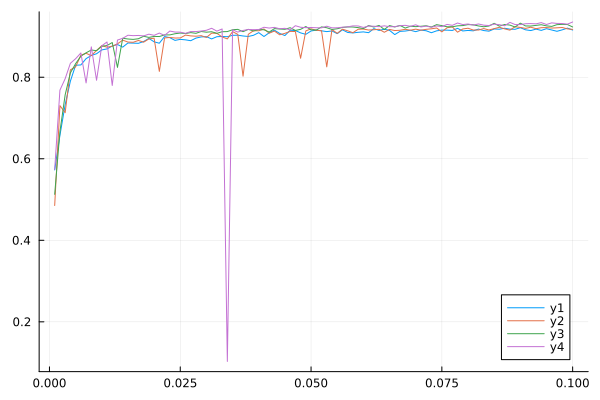

In [34]:
plot( λ , test[1,:])
plot!( λ , test[2,:])
plot!( λ , test[3,:])
plot!( λ , test[4,:])

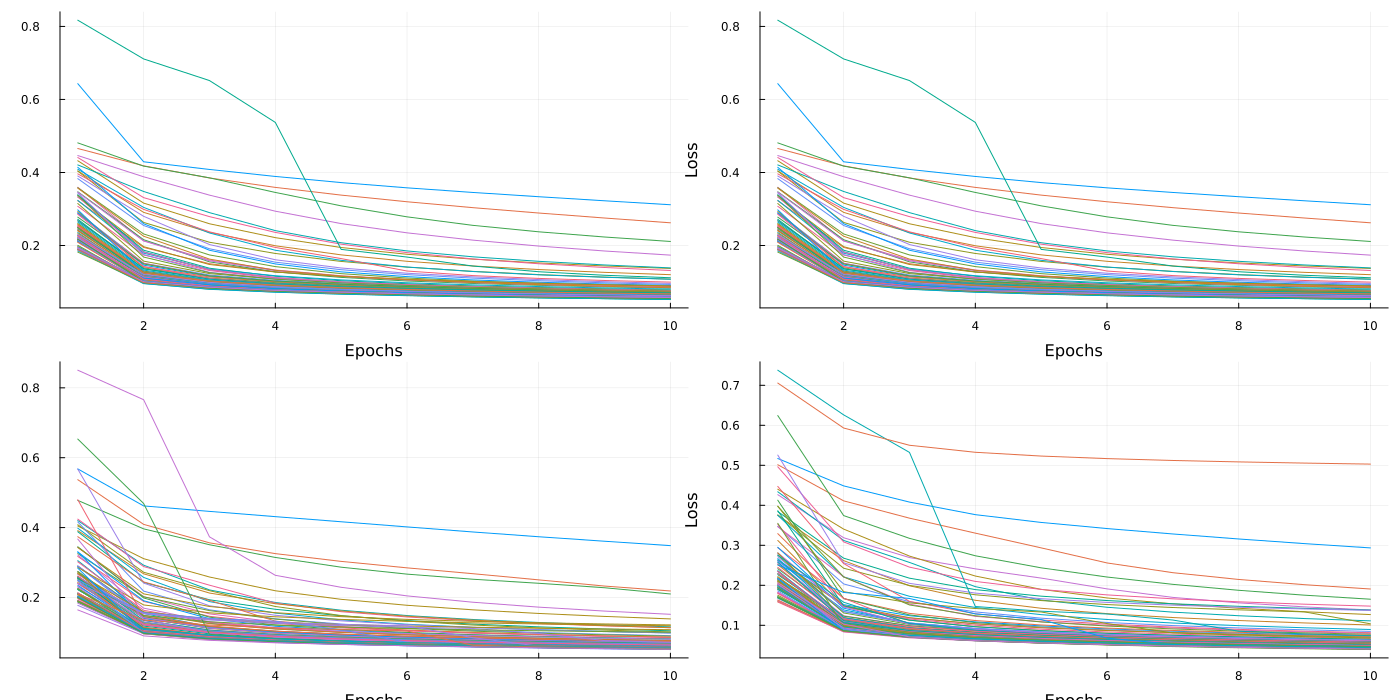

In [29]:
p1 = plot( Losses[1,:] , legend =false )
p2 = plot( Losses[2,:] , legend =false )
p3 = plot( Losses[3,:] , legend =false )
p4 = plot( Losses[4,:] , legend =false )

plot(p1,p1,p2,p4 , size = (1400,700) , xlabel = "Epochs" , ylabel = "Loss")

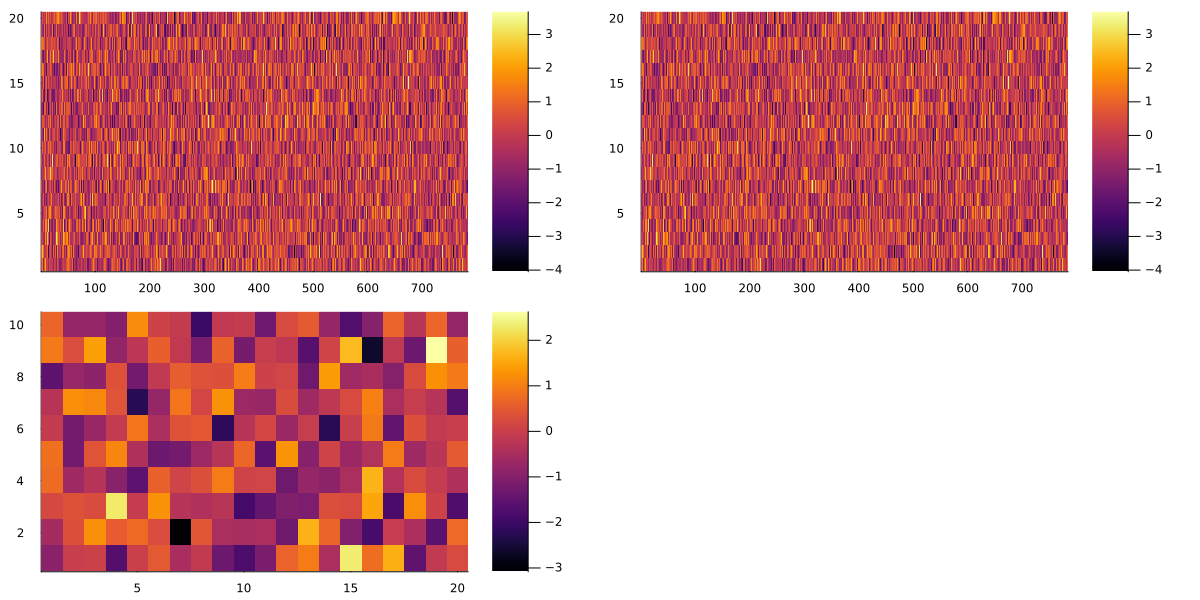

In [48]:
p1 = heatmap( NNs[1].w1 )
p2 = heatmap( NNs[1].w2 )
p3 = heatmap( NNs[1].w3 )

plot(p1,p1,p3 , size = (1200,600))